### **DATA PREPROCESSING**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Display the first few rows of each dataset
print("\nCustomers Dataset Preview:")
print(customers.head())
print("\nProducts Dataset Preview:")
print(products.head())
print("\nTransactions Dataset Preview:")
print(transactions.head())

# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics for Transactions Dataset:")
print(transactions.describe())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

### **CUSTOMER ANALYSIS**

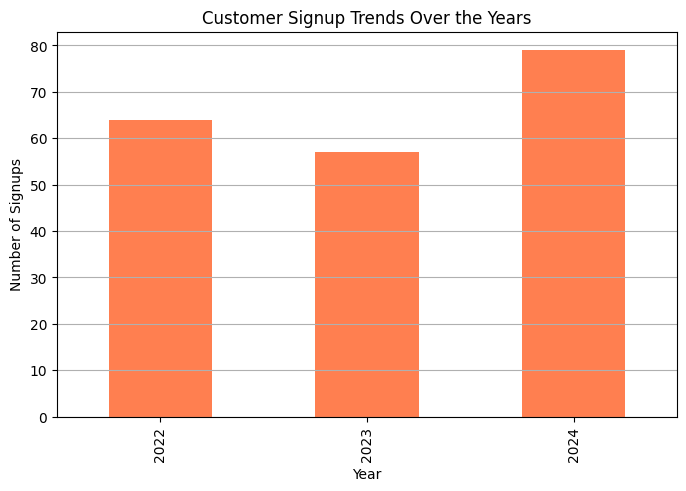

<ipython-input-4-08031b643dca>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="muted", order=customers["Region"].value_counts().index)


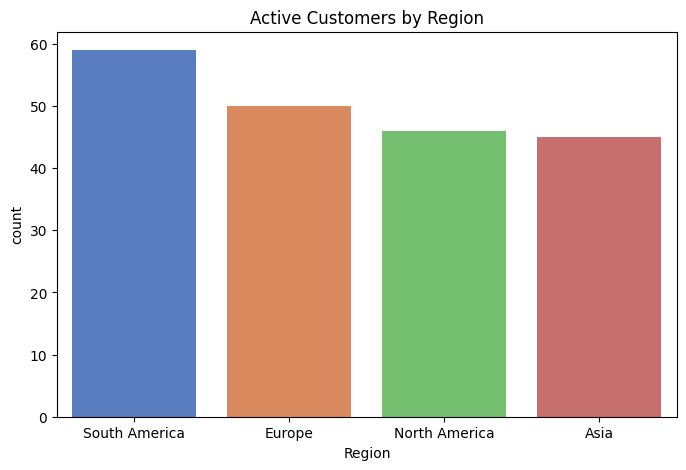

In [4]:
# Signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year

signup_trends = customers['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar', color='coral')
plt.title("Customer Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid(axis='y')
plt.show()

# Active customers by region
active_customers_region = transactions['CustomerID'].nunique()
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="muted", order=customers["Region"].value_counts().index)
plt.title("Active Customers by Region")
plt.show()


### **PRODUCT ANALYSIS**

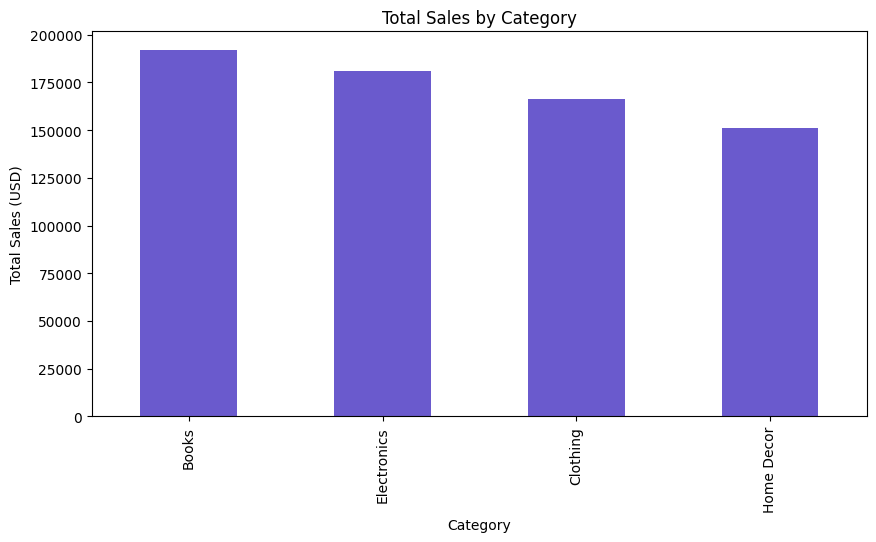

<ipython-input-5-abc2bd74d957>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products, x="Category", y="Price", palette="Set2")


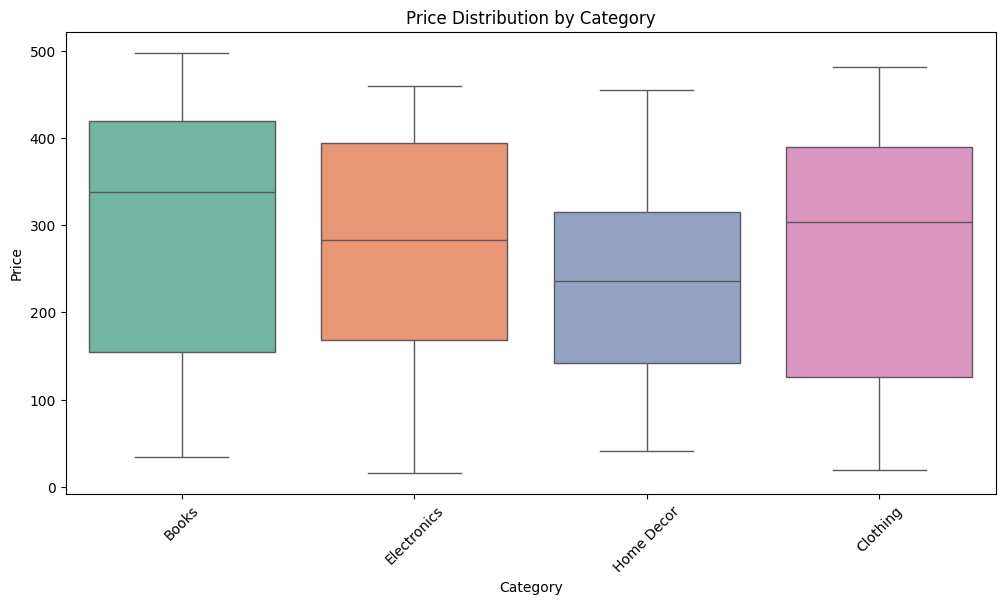

In [5]:
# Sales distribution by category
category_sales = transactions.merge(products, on="ProductID").groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='slateblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()

# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x="Category", y="Price", palette="Set2")
plt.title("Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()


### **TRANSACTION INSIGHTS**

Number of high-value transactions (Top 5%): 50
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
74         T00007      C0173      P023 2024-05-06 18:05:22         4   
82         T00997      C0164      P023 2024-11-01 23:04:56         4   
118        T00012      C0091      P041 2024-03-29 01:28:17         4   
119        T00034      C0168      P041 2024-01-09 11:00:50         4   
120        T00094      C0012      P041 2024-07-14 19:37:54         4   

     TotalValue   Price    Month  
74      1818.12  454.53  2024-05  
82      1818.12  454.53  2024-11  
118     1825.12  456.28  2024-03  
119     1825.12  456.28  2024-01  
120     1825.12  456.28  2024-07  


<ipython-input-6-8afbda6e3e7a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, x="DayOfWeek", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


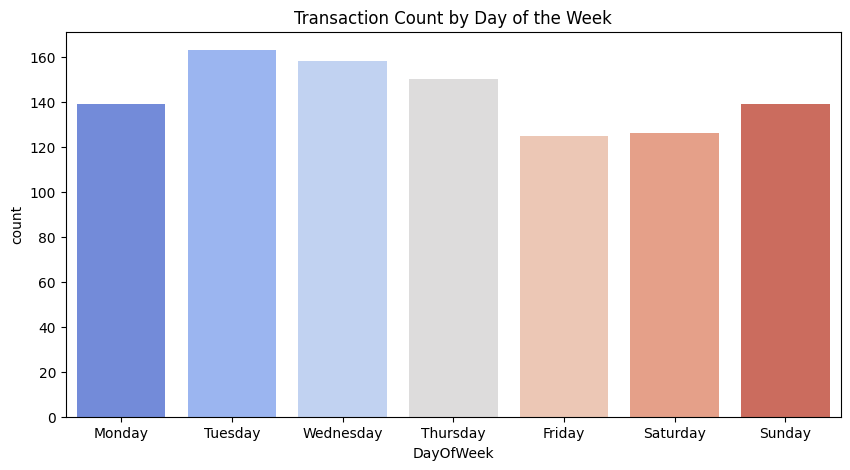

In [6]:
# High-value transactions
high_value_transactions = transactions[transactions['TotalValue'] > transactions['TotalValue'].quantile(0.95)]
print(f"Number of high-value transactions (Top 5%): {len(high_value_transactions)}")
print(high_value_transactions.head())

# Transaction patterns by day of the week
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.countplot(data=transactions, x="DayOfWeek", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Transaction Count by Day of the Week")
plt.show()


### **REGIONAL INSIGHTS**

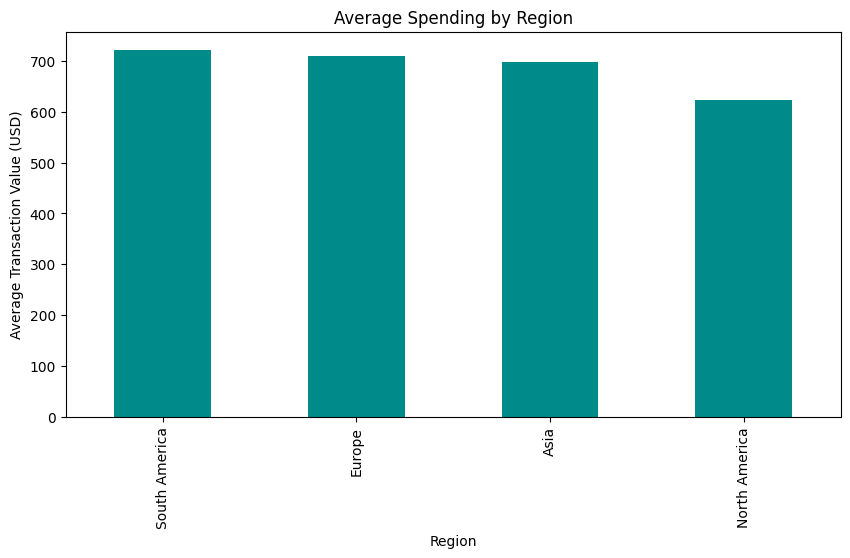

In [7]:
# Average spending by region
regional_spending = transactions.merge(customers, on="CustomerID").groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
regional_spending.plot(kind='bar', color='darkcyan')
plt.title("Average Spending by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()


### **CORRELATION ANALYSIS**

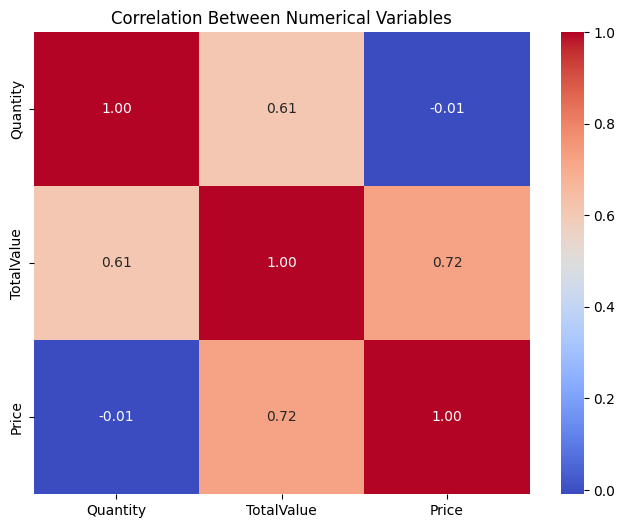

In [9]:
# Correlation heatmap
numerical_cols = transactions[['Quantity', 'TotalValue', 'Price']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Between Numerical Variables")
plt.show()


### **OUTLIER DETECTION**

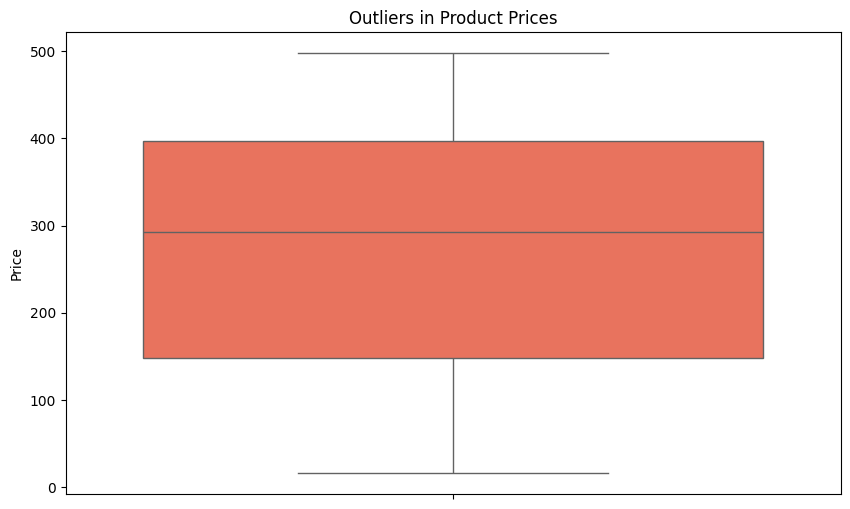

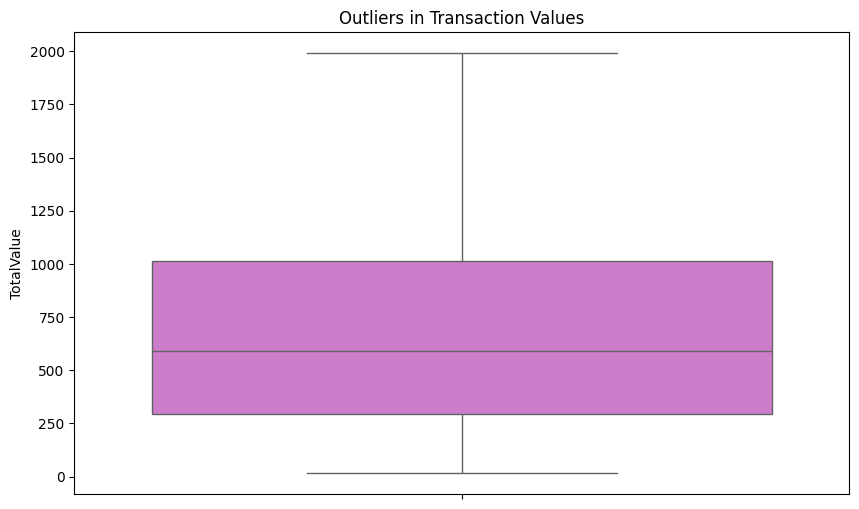

In [10]:
# Outliers in product prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=products, y="Price", color="tomato")
plt.title("Outliers in Product Prices")
plt.show()

# Outliers in transaction values
plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions, y="TotalValue", color="orchid")
plt.title("Outliers in Transaction Values")
plt.show()


### **CATEGORICAL FEATURE RELATIONSHIP**

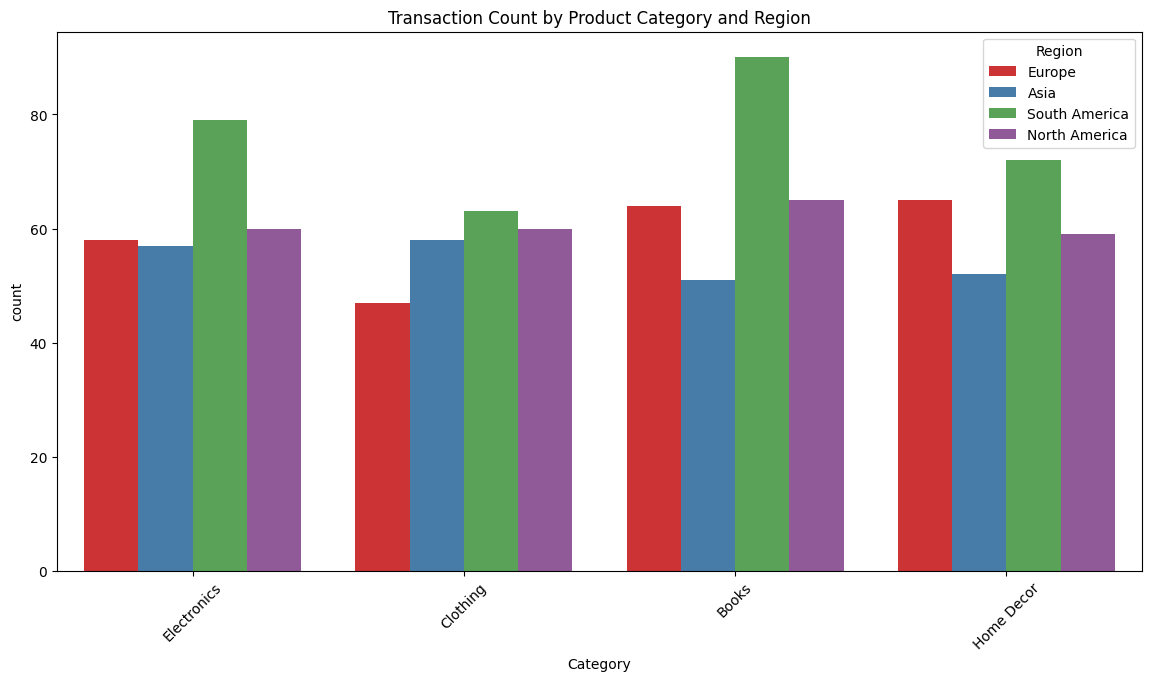

In [11]:
# Transaction count by product category and region
category_region_sales = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
plt.figure(figsize=(14, 7))
sns.countplot(data=category_region_sales, x="Category", hue="Region", palette="Set1")
plt.title("Transaction Count by Product Category and Region")
plt.xticks(rotation=45)
plt.show()


### **EDA WITH VISUALISATION**

<ipython-input-12-228048d1a28d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


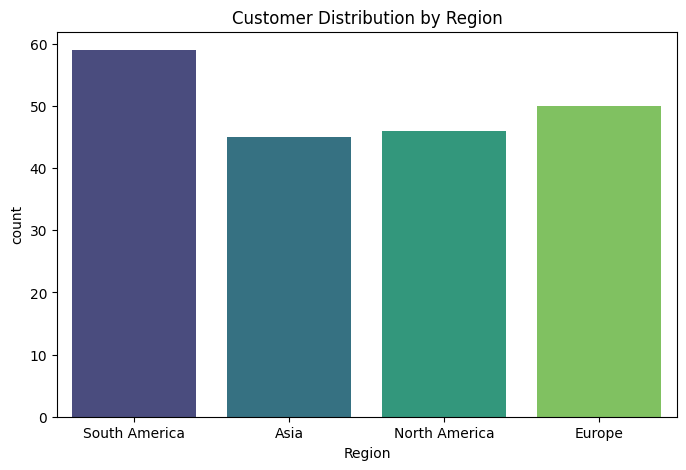

<ipython-input-12-228048d1a28d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Price", y="ProductName", palette="coolwarm")


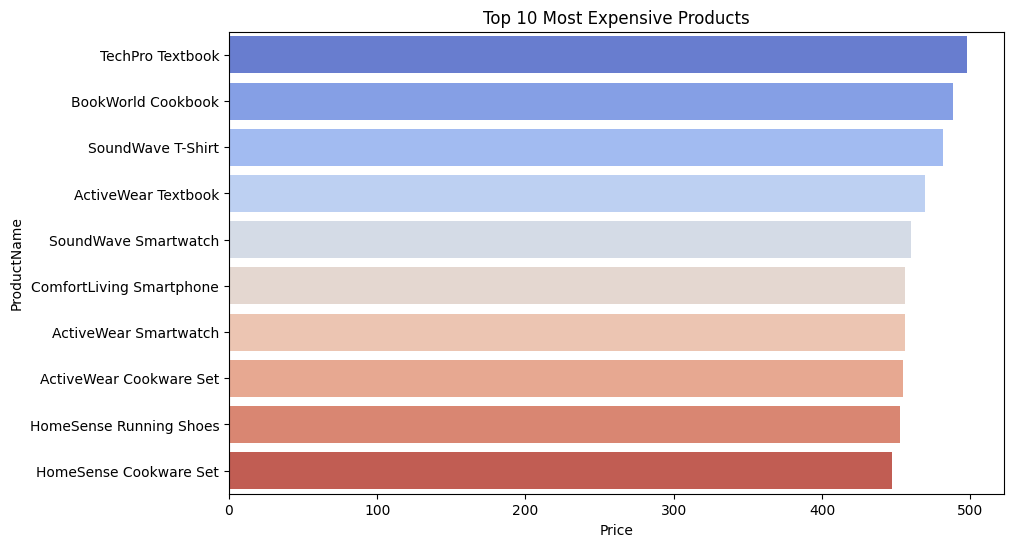

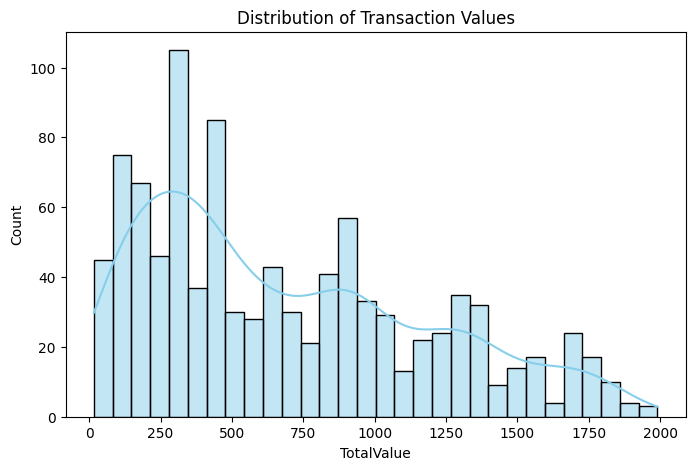

<ipython-input-12-228048d1a28d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_purchased.values, y=most_purchased_products['ProductName'], palette="mako")


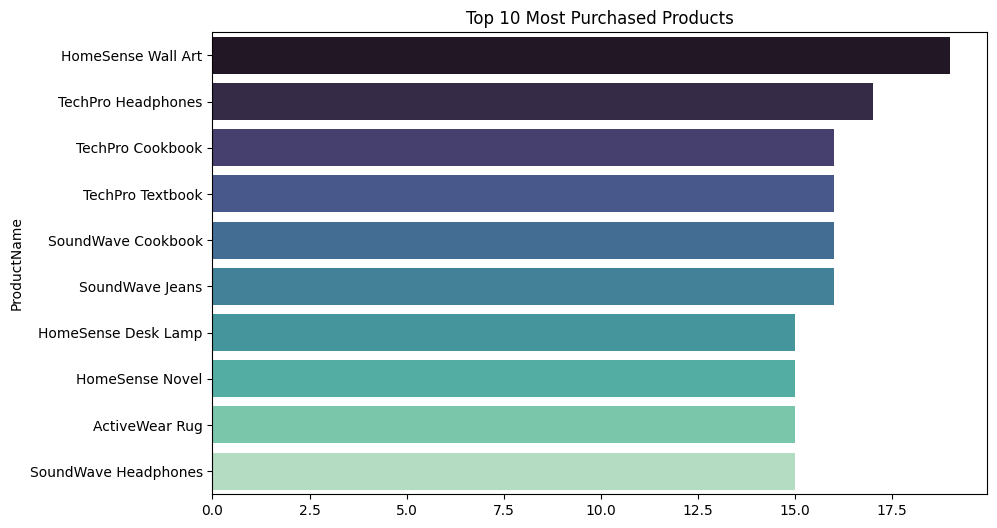

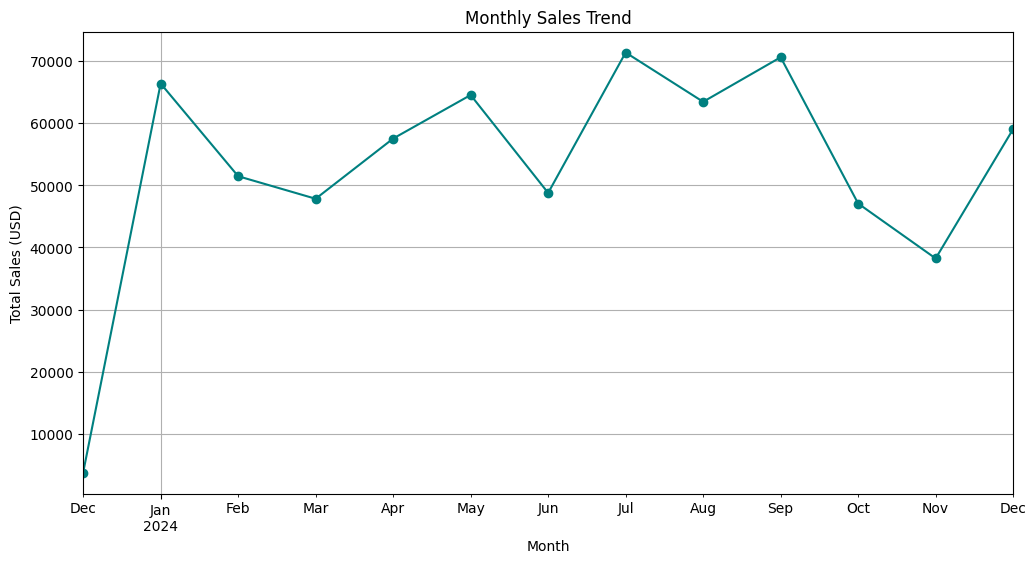

In [12]:
# Plot the distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.show()

# Top 10 products by price
top_products = products.nlargest(10, 'Price')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="Price", y="ProductName", palette="coolwarm")
plt.title("Top 10 Most Expensive Products")
plt.show()

# Distribution of transaction values
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Transaction Values")
plt.show()

# Most purchased products
most_purchased = transactions['ProductID'].value_counts().head(10)
most_purchased_products = products[products['ProductID'].isin(most_purchased.index)]

plt.figure(figsize=(10, 6))
sns.barplot(x=most_purchased.values, y=most_purchased_products['ProductName'], palette="mako")
plt.title("Top 10 Most Purchased Products")
plt.show()

# Monthly transaction trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()